# Basic Example

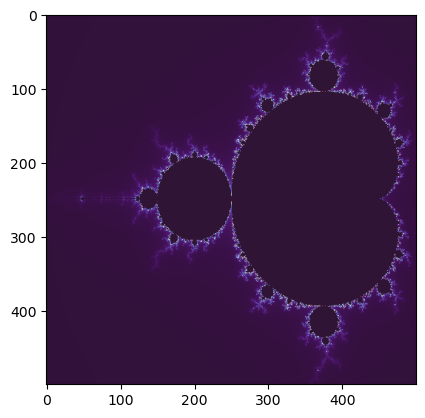

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from yapybrot import Mandelbrot

# Create a Mandelbrot object with default settings
mand = Mandelbrot()

# calculate() and plot the result
buffer = mand.calculate()
plt.imshow(buffer)

In [2]:
# Attributes can be overridden. First let's see the defaults.
print(mand.__dict__)

{'width': 500, 'height': 500, 'xmin': -2, 'xmax': 0.5, 'ymin': -1.12, 'ymax': 1.12, 'max_iter': 256, 'cmap': 'twilight_shifted', 'palette': array([[ 47,  19,  55, 255],
       [ 48,  18,  56, 255],
       [ 50,  17,  58, 255],
       ...,
       [ 49,  18,  54, 255],
       [ 47,  19,  54, 255],
       [ 47,  20,  54, 255]]), 'smoothing': True}


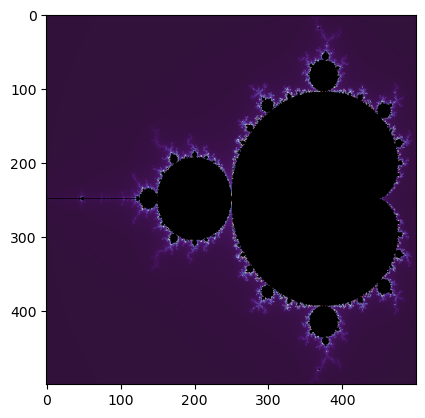

In [3]:
# Now plot the points within the Mandelbrot set as solid black by modifying the palette.
mand.palette[-1, :] = np.array([0, 0, 0, 255])
buffer = mand.calculate()
plt.imshow(buffer)

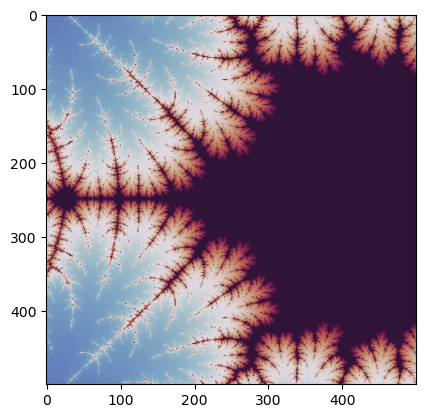

In [4]:
# Attributes can also be set via keyword arguments.
mand = Mandelbrot(xmin=-1.402, xmax=-1.400, ymin=-0.001, ymax=0.001)
buffer = mand.calculate()
plt.imshow(buffer)

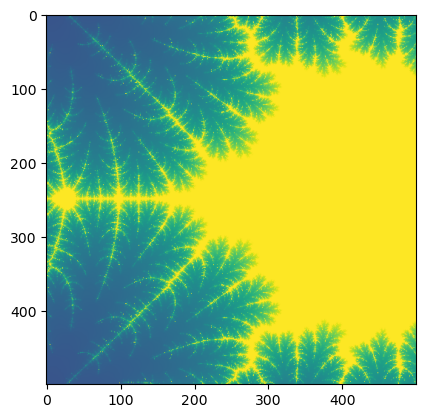

In [5]:
# ...and via calculate()'s keyword arguments
buffer = mand.calculate(cmap='viridis')
plt.imshow(buffer)

# Advanced Example

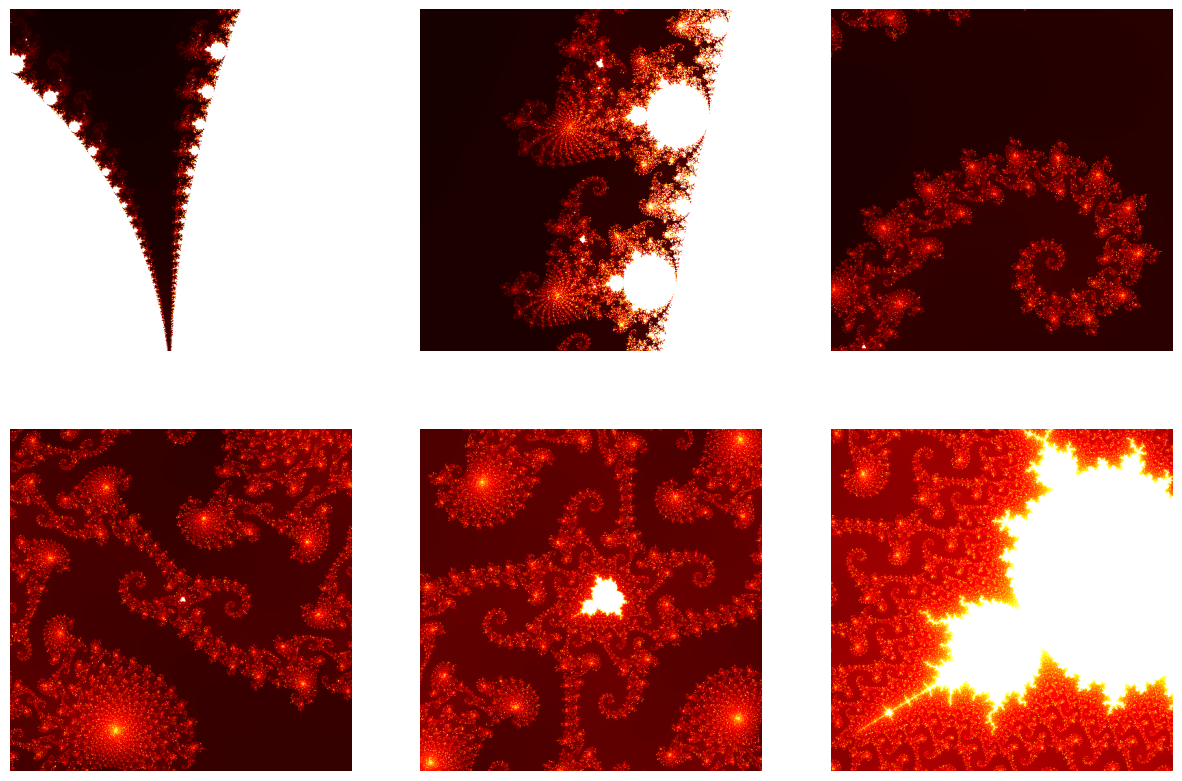

In [14]:
# In this example, we'll zoom in and plot the result as an animated gif. 

# Begin by choosing an interesting center point.
# Source: https://commons.wikimedia.org/wiki/File:Mandel_zoom_09_satellite_head_and_shoulder_3D.jpg
xc = -0.74364409961
yc = 0.13182604688

# Start and ending window sizes
size0 = 0.1
size1 = 6e-7

# To zoom in smoothly, the window size should decay exponentially. Choose the rate of decay by experimentation.
k = 2.2

# We'll need more iterations for finer detail
mand = Mandelbrot(cmap='hot', max_iter=1000)

# And now plot a preview...
buffers = []
for i in range(6):
    size = (size0 - size1) * np.exp(-k * i) + size1
    buffer = mand.calculate(xmin=xc-size, xmax=xc+size,
                            ymin=yc-size, ymax=yc+size)
    buffers.append(np.copy(buffer))
    
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, a in enumerate(ax[0]):
    a.set_axis_off()
    a.imshow(buffers[i])

for i, a in enumerate(ax[1]):
    a.set_axis_off()
    a.imshow(buffers[i+3])

In [16]:
# Now to make the gif, we use Pillow...
from PIL import Image
import time

frames = 1000
k = 2.2 * 5 / frames
images = []

# This will take a while...
start = time.time()
for i in range(frames):
    size = (size0 - size1) * np.exp(-k * i) + size1
    
    if (i+1) % 10 == 0:
        end = time.time()
        print(f'Rendering frame: {i+1}... size={size}  avg time={(end-start)/10}')
        start = time.time()
        
    buffer = mand.calculate(xmin=xc-size, xmax=xc+size,
                            ymin=yc-size, ymax=yc+size)
    
    im = Image.fromarray(buffer.astype('uint8'))
    images.append(im)

print('Saving gif...')
images[0].save('zoom.gif', save_all=True, append_images=images[1:], optimize=False, duration=30, loop=0)

Rendering frame: 10... size=0.09057432735673004  avg time=0.921803331375122
Rendering frame: 20... size=0.08113963672719976  avg time=1.0108996868133544
Rendering frame: 30... size=0.07268771880530425  avg time=0.9889967441558838
Rendering frame: 40... size=0.06511620222214574  avg time=0.9676034212112427
Rendering frame: 50... size=0.058333379210988634  avg time=0.9572000741958618
Rendering frame: 60... size=0.052257094823919305  avg time=0.9333999633789063
Rendering frame: 70... size=0.04681375185421325  avg time=0.9132002115249633
Rendering frame: 80... size=0.041937419411824196  avg time=0.89730863571167
Rendering frame: 90... size=0.03756903435487819  avg time=0.8743999242782593
Rendering frame: 100... size=0.033655685904746685  avg time=0.857096529006958
Rendering frame: 110... size=0.03014997477980913  avg time=0.8401035070419312
Rendering frame: 120... size=0.027009439085601265  avg time=0.8454002141952515
Rendering frame: 130... size=0.024196040007612687  avg time=0.8253963708

![](./zoom.gif)